# 프로젝트 : 다양한 OCR모델 비교하기

## Step1. 검증용 데이터셋 준비
-  테스트용 이미지 20장 넘기지 않게 모으기

<B>- OCR 접목 서비스: 우리 업체의 홍보 이미지상의 텍스트를 읽고, 기업 슬로건 만들기!</B>
 - 우리 기업의 홍보용 이미지에서 중심 문구는 무엇일까요?
 - 기존에 작업되었던 홍보 이미지에 OCR을 활용하여 광고 문구들을 추출하고 워드클라우드로 만들어보기
 - 워드클라우드에 나온 중심단어를 바탕으로 슬로건 만들기


- 시작 전 주의 사항
 - 케라스 OCR은 한글 데이터셋으로 훈련이 되지 않은 모델, detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의
 - 대부분 OCR은 한글 데이터셋으로 훈련되지 않아 인식률이 떨어질수 있다.

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import keras_ocr

import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as pl

In [2]:
# load images
image_path = os.getenv('HOME')+ '/aiffel/ocr_python/test_image'
file_list = sorted(os.listdir(image_path))  #파일명 jpg, JPG로 구분 정렬
file_list

['test_image1.jpg',
 'test_image10.JPG',
 'test_image11.JPG',
 'test_image12.JPG',
 'test_image14.JPG',
 'test_image15.JPG',
 'test_image16.JPG',
 'test_image17.JPG',
 'test_image2.jpg',
 'test_image20.JPG',
 'test_image3.JPG',
 'test_image5.JPG',
 'test_image6.JPG',
 'test_image7.JPG',
 'test_image8.JPG',
 'test_image9.JPG']

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행
- 위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

### 1) Google OCR API test
- 구글의 파이썬 API 인터페이스 모듈 설치필요

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:
# Google Cloud Vision API

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

In [5]:
# 기존 노드 경로는 1개의 파일만 불러오기 때문에 반복 작업 필요
for file in file_list:
    print(f'[{file}]')
    detect_text(os.path.join(image_path, file))  

    print('-------------------------------------------------------------------------')

[test_image1.jpg]
Texts:

"인공지능교육 선지원 후고민-
AIFFEL
인공지능혁신학교
교육생 모집
D8 모두의연구소 AIFFEL
"

"인공"

"지능"

"교육"

"선"

"지원"

"후"

"고민"

"-"

"AIFFEL"

"인공"

"지능"

"혁신"

"학교"

"교육생"

"모집"

"D8"

"모두"

"의"

"연구소"

"AIFFEL"
bounds: (355,391),(437,391),(437,406),(355,406)
-------------------------------------------------------------------------
[test_image10.JPG]
Texts:

"상생과 공유 문화로 AI 혁신학교를 만들겠다는 슬로건이 눈에띄어
아이펠 교육을수강하게 되었습니다. 이전에도 짧은 AI 관련교육을
들어보긴하였으나 강사님의 코드를 받아 적는 것에만 집중을 하게
되었고실력이 크게 늘지 않았다고느꼈었습니다. 아이펠은 이와 같은
주입식 교육이 아니었고서로 같이 배워 나가는 문화였습니다. 그렇기에
강사님이 없고 학습의 방향성을 알려주는 퍼실리테이터 분들이
있었습니다. 교육방식은 LMS노드를 학습하거나풀잎스쿨에서
스터디와 같이 토론 방식으로 진행되었습니다. 처음에는 알고 있는 것을
설명해주는문화가익숙하지 않아 어색하였지만 퍼실리테이터 분들이
자유롭게토론할수 있도록 분위기 형성을 도와주었습니다. 덕분에
이해가되지 않는 부분을 주변 교육생들에게 물어보며 이해할 수 있었고,
저 또한, 알고 있는 지식을 다른 분들에게 설명하다보면 제 머릿속에
다시 한번 정리가되었기에적극참여할수 있었습니다. -대전1기
"

"상생"

"과"

"공유"

"문화"

"로"

"AI"

"혁신"

"학교"

"를"

"만들"

"겠다는"

"슬로건"

"이"

"눈"

"에"

"띄어"

"아이"

"펠"

"교육"

"을"

"수강"

"하게"

"되었습니다"

"."

"이전"

"에도"

"짧은"

"AI"

"관련"

"교육

Texts:

"5.19(수)는
자정 마감!!
A혁신학교 Alㅠㅠ=L
2021년 하반기,
프로젝트 경험을 쌓으며 AI 개발자로 직무 전환을 하고 싶다면?
고용노동부 모두의연구소
신입생 모집
NVIDIA.Jetson Nano Certifications ll801
함께 있어요!
MB접수 2021.04.14일(수)~05.19(수) 자정
일점
2021.06.24~ 12.15 총 6개월 840시간
인천 40명 / 강남 48명 / 양재 60명
고용노동부
국비 지원!
"

"5.19"

"("

"수"

")"

"는"

"자정"

"마감"

"!!"

"A"

"혁신"

"학교"

"Al"

"ㅠㅠ"

"="

"L"

"2021"

"년"

"하반기"

","

"프로젝트"

"경험"

"을"

"쌓으며"

"AI"

"개발자"

"로"

"직무"

"전환"

"을"

"하고"

"싶다면"

"?"

"고용"

"노동부"

"모두"

"의"

"연구소"

"신입생"

"모집"

"NVIDIA.Jetson"

"Nano"

"Certifications"

"ll801"

"함께"

"있어요"

"!"

"MB"

"접수"

"2021.04.14"

"일"

"("

"수"

")"

"~"

"05.19"

"("

"수"

")"

"자정"

"일점"

"2021.06.24"

"~"

"12.15"

"총"

"6"

"개월"

"840"

"시간"

"인천"

"40"

"명"

"/"

"강남"

"48"

"명"

"/"

"양재"

"60"

"명"

"고용"

"노동부"

"국비"

"지원"

"!"
bounds: (626,323),(632,317),(652,338),(646,344)
-------------------------------------------------------------------------
[test_image3.JPG]
Texts:

"AIFFEL
Last Chance!
고용노동부주관
제1회 K-Digital Training 해커톤

<mark>[os.path.join 함수]</mark>
- 경로(패스)명 조작에 관한 처리를 모아둔 모듈로써 구현되어 있는 함수
- 경로와 피일명을 결합, 분할된 경로를 하나로 정리하거나하는 것이 가능

출처: https://engineer-mole.tistory.com/188 [매일 꾸준히, 더 깊이]

### 2)  keras-ocr  test

- <a href="https://keras-ocr.readthedocs.io/en/latest/index.html" target="_blank">Keras OCR 자세히 보기</a> 
- 한글 데이터셋으로 훈련이 되지 않은 모델, detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음에 주의

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector(작동기)과 recognizer(인식기)를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline() #

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
# 테스트에 사용할 이미지 모으기, 기존 노드는 url이나 os.path.join(image_path, file) 으로 변경 필요 

images = [keras_ocr.tools.read(os.path.join(image_path, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(image_path, file)]) for file in file_list]

- recognize() 는 검출기와 인식기를 두고, 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 한다. 

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


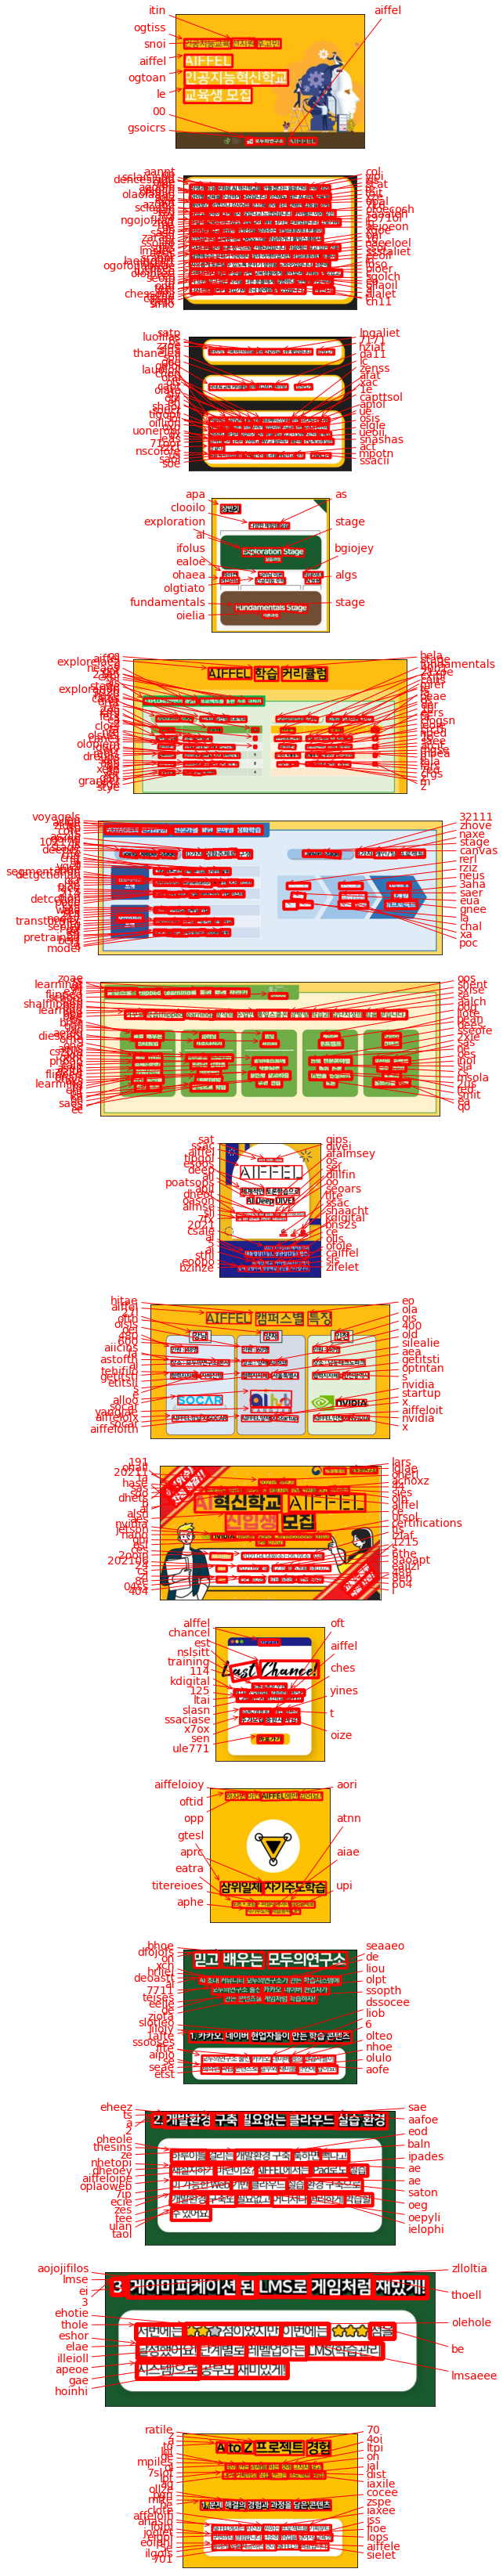

In [8]:
# 인식된 결과 시각화

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(60, 60))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 3) Tesseract test

- crop_word_regions()함수: 선택한 테스트 이미지를 받아, 문자 검출 진행 후, 검출된 문자 영역을 crop 이미지로 만들고 그 파일들의 list 리턴

In [15]:
# 검출 및 이미지 자르기

import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# 1.  OCR 엔진 모드(–oem):
# 0 - 레거시 엔진 전용.
# 1 - 신경망 LSTM 엔진 전용.
# 2 - 레거시 + LSTM 엔진.
# 3 - 사용 가능한 항목을 기반으로 한 기본값입니다.

# 2. 페이지 분할 모드(–psm):
# 0 - 방향 및 스크립트 감지(OSD) 전용.
# 1 - OSD를 사용한 자동 페이지 분할.
# 2 - 자동 페이지 분할이지만 OSD 또는 OCR은 없습니다.
# 3 - 완전 자동 페이지 분할이지만 OSD는 없습니다. (기본)
# 4 - 가변 크기의 단일 텍스트 열을 가정합니다.
# 5 - 세로로 정렬된 텍스트의 균일한 단일 블록을 가정합니다.
# 6 - 하나의 균일한 텍스트 블록을 가정합니다.
# 7 - 이미지를 단일 텍스트 줄로 취급합니다.
# 8 - 이미지를 한 단어로 취급합니다.
# 9 - 이미지를 원 안의 한 단어로 취급합니다.
# 10 - 이미지를 단일 문자로 취급합니다.
# 11 - 희소 텍스트. 특정 순서 없이 가능한 한 많은 텍스트를 찾습니다.
# 12 - OSD가 있는 희소 텍스트.
# 13 - 원시 라인. Tesseract 관련 해킹을 우회하여 이미지를 단일 텍스트 줄로 취급합니다.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


In [16]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test_image'
img_file_path = work_dir + '/test_image17.JPG'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 


In [17]:
cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test_image/0000.png
/aiffel/aiffel/ocr_python/test_image/0001.png
/aiffel/aiffel/ocr_python/test_image/0002.png
/aiffel/aiffel/ocr_python/test_image/0003.png
/aiffel/aiffel/ocr_python/test_image/0004.png
/aiffel/aiffel/ocr_python/test_image/0005.png
/aiffel/aiffel/ocr_python/test_image/0006.png
/aiffel/aiffel/ocr_python/test_image/0007.png
/aiffel/aiffel/ocr_python/test_image/0008.png
/aiffel/aiffel/ocr_python/test_image/0009.png
/aiffel/aiffel/ocr_python/test_image/0010.png
/aiffel/aiffel/ocr_python/test_image/0011.png
/aiffel/aiffel/ocr_python/test_image/0012.png
/aiffel/aiffel/ocr_python/test_image/0013.png
/aiffel/aiffel/ocr_python/test_image/0014.png
/aiffel/aiffel/ocr_python/test_image/0015.png
/aiffel/aiffel/ocr_python/test_image/0016.png
/aiffel/aiffel/ocr_python/test_image/0017.png
/aiffel/aiffel/ocr_python/test_image/0018.png
/aiffel/aiffel/ocr_python/test_image/0019.png
/aiffel/aiffel/ocr_python/test_image/0020.png
/aiffel/aiffel/ocr_python/test_ima

4) 테서랙트로 잘린 이미지에서 단어 인식하기

In [18]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(  #검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나온다.
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

. 2

SSAC

AS i

ARTA

ha

=a

A|I-

|

-

7

A219]

EfostOe

a. “= OOS

Al

Deep

DIVE!

Cif O10F

+ A0}|

Ay KPA

FSF ot

ot

re]

A|A&(LMS)

St]

Hi] 7}

KF OIA|AI0 |

Aluvl=sS

OFL ES A |

t

~

yy >


=| —

PS o4-7s

ru

‘i

\


AVA

-digital o}

a

a)

i

jes

ie

ae

ey

linia

Ss f a

Done


### Step3. 테스트 결과 정리
- 모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리

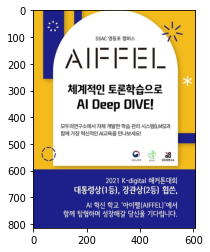

In [19]:
# 테스트 이미지 확인
test_image_path = os.getenv('HOME')+'/aiffel/ocr_python/test_image/test_image17.JPG'
img_bgr = cv2.imread(test_image_path)    
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
plt.imshow(img_rgb)
plt.show()

- 숫자, 한글 및 영어 텍스트 및 AIFFEL로고가 고루 섞여 있어 선정하였다.  여러 모듈의AIFFEL 로고 인식여부와 텍스트 출력형태 확인하고자 함

#### 1) Google OCR API test

In [27]:
# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(test_image_path)

Texts:

"SSAC 영등포 캠퍼스
AIFFEL
체계적인 토론학습으로
AI Deep DIVE!
모두의연구소에서 자체 개발한 학습 관리 시스템(LMS)과
함께 가장 혁신적인 Al교육을 만나보세요!
品
모두의연구소
고용노동부
SSAC
2021 K-digital 해커톤대회
대통령상(1등), 장관상(2등) 휩쓴,
AI 혁신 학교 '아이펠(AIFFEL)'에서
함께 탐험하며 성장해갈 당신을 기다립니니다.
"

"SSAC"

"영등포"

"캠퍼스"

"AIFFEL"

"체계적인"

"토론"

"학습"

"으로"

"AI"

"Deep"

"DIVE!"

"모두"

"의"

"연구소"

"에서"

"자체"

"개발"

"한"

"학습"

"관리"

"시스템"

"("

"LMS"

")"

"과"

"함께"

"가장"

"혁신적인"

"Al"

"교육"

"을"

"만나"

"보세요"

"!"

"品"

"모두"

"의"

"연구소"

"고용"

"노동부"

"SSAC"

"2021"

"K"

"-"

"digital"

"해커"

"톤"

"대회"

"대통령"

"상"

"("

"1"

"등"

")"

","

"장관상"

"("

"2"

"등"

")"

"휩쓴"

","

"AI"

"혁신"

"학교"

"'"

"아이"

"펠"

"("

"AIFFEL"

")"

"'"

"에서"

"함께"

"탐험"

"하며"

"성장"

"해갈"

"당신"

"을"

"기다"

"립니"

"니다"

"."
bounds: (531,746),(534,746),(534,778),(531,778)


In [ ]:
- AIFFEL 로고 및 화질이 낮은 텍스트 영역도 인식률이 높았다.
- 品는 아마 동그라미 표시를 인식하지 못해서 생긴것 같다.
- '기다립니니다.'등 약간의 오타는 확인이 되었다.

#### 2)  keras-ocr  test

![keras](https://user-images.githubusercontent.com/70866993/134372489-1b20c6ba-6e7e-4f5b-97ab-f7db6d378809.jpg)


- keras는 인식후 대다수 영문 소문자의 출력형태를 보이며, SSAC AIFFEL 등 로고등은 인식을 잘 하였지만 
간격이 좁은 경우 AI Deep DIVE!를 ai, afalmsey 등으로 인식을 잘 하지 못하는 모습을  보았다. 
한국어 인식 아예 인식을 못했고, 숫자등도 일부 인식이 잘 되지 안되는것으로 확인 되었다. 
시각적으로 해당 인식된 위치를 표현해 주는 기능은 편리한것 같다.

#### 3) Tesseract test

In [26]:
# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

. 2

SSAC

AS i

ARTA

ha

=a

A|I-

|

-

7

A219]

EfostOe

a. “= OOS

Al

Deep

DIVE!

Cif O10F

+ A0}|

Ay KPA

FSF ot

ot

re]

A|A&(LMS)

St]

Hi] 7}

KF OIA|AI0 |

Aluvl=sS

OFL ES A |

t

~

yy >


=| —

PS o4-7s

ru

‘i

\


AVA

-digital o}

a

a)

i

jes

ie

ae

ey

linia

Ss f a

Done


- keras ocr 보다 영문 대소등 영문은 인식률은 좋은편이나 동일하게 한국어 인식률은 크게 떨어졌다.
숫자는 되려 keras ocr보다 인식률이 떨어졌다. 개인적으로 가장 안좋은 인식률을 보였다. 오픈소스의 한계로 보인다.

### Step4. 결과 분석과 결론 제시
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다.
그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

- Google OCR API ,  keras-ocr,  Tesseract 중에 한국어 인식률에서 Google OCR 이 가장 압도적인 인식률을 보였다.
인식된 텍스트 리스트가 필요할 경우 Google OCR가 활용되면 좋지만 시각화로 인식된 위치를 표현하는  keras-ocr 의 기능도 추가되면 좋겠다. Tesseract test은 전체적으로 인식률이 떨어져서 사용하지 않을것 같다. 

- 한글 인식률을 활용한 서비스 이용시 Google OCR API를 사용하는것을 추천한다. 

- 내가 수강중인 AIFFEL의 홍보 이미지 16장을 모아 OCR을 활용하여 광고 문구들을 추출하고 워드클라우드로 만들어 보았다.
이를 토대로 간단하게 중심단어를 워드클라우드로 확인하고 슬로건으로 만들어보았다.

- 16개의 홍보시안 에서 문구를 발췌 하여 워드클라우드로 구현해 보았다. 
- 중심단어는 'AIFFEL', '프로젝트', '모두의연구소', 'AI', '학습', '딥러닝' 으로 확인 된다. 이제 슬로건을 만들어 보자.!
- <MARK> <슬로건>  AI 프로젝트 NO.1, AIFFEL  </MARK>

![wordcloud_20210922233200](https://user-images.githubusercontent.com/70866993/134363470-e480c1d1-e8ed-4719-9008-4d75fb250fff.png)

## 루브릭

- 목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.
- 평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다
- 최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

# 회고

- 역시 구글이다 싶었다. 유료서비스라도 인식률이 높아서 매우 쓸만한것 같다.  
- KERAS OCR의 경우 인식 위치등을 표현해 주는 기능이 매우 좋았다. 인식률만 높인다면 CV쪽에 쓰임이 많을것 같다.  
- 회사다닐때 슬로건 만들일이 년중 행사라 새로 만들때마다 고심했던 기억이 있어 만들게 되었는데
기존 작업물인 홍보이미지의 구문을 활용하다보니 공수도 많이 안들고 과정이 꽤나 재밌었다. 추후 중심단어로 새로운 광고카피 문구까지 구현해 보는 프로젝트를 해보는것도 재밌을것 같다. 